In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
airline_df=pd.read_csv("Airline_Delay_Cause.csv")
airline_df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171661,2013,8,YV,Mesa Airlines Inc.,TRI,"Bristol/Johnson City/Kingsport, TN: Tri Cities",7.0,1.0,0.78,0.00,...,0.0,0.00,0.0,0.0,23.0,18.0,0.0,5.0,0.0,0.0
171662,2013,8,YV,Mesa Airlines Inc.,YUM,"Yuma, AZ: Yuma MCAS/Yuma International",2.0,1.0,0.00,0.00,...,0.0,1.00,0.0,0.0,17.0,0.0,0.0,0.0,0.0,17.0
171663,2013,8,YV,Mesa Airlines Inc.,SLC,"Salt Lake City, UT: Salt Lake City International",2.0,0.0,0.00,0.00,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171664,2013,8,DL,Delta Air Lines Inc.,SBN,"South Bend, IN: South Bend International",1.0,1.0,1.00,0.00,...,0.0,0.00,0.0,0.0,18.0,18.0,0.0,0.0,0.0,0.0


In [5]:
airline_df.isna().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            240
arr_del15              443
carrier_ct             240
weather_ct             240
nas_ct                 240
security_ct            240
late_aircraft_ct       240
arr_cancelled          240
arr_diverted           240
arr_delay              240
carrier_delay          240
weather_delay          240
nas_delay              240
security_delay         240
late_aircraft_delay    240
dtype: int64

In [6]:
delay_cols=["arr_delay","carrier_delay","weather_delay","nas_delay","security_delay","late_aircraft_delay"]

In [7]:
for col in delay_cols:
    airline_df[col]=airline_df[col].fillna(airline_df[col].median())

In [8]:
airline_df.isna().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            240
arr_del15              443
carrier_ct             240
weather_ct             240
nas_ct                 240
security_ct            240
late_aircraft_ct       240
arr_cancelled          240
arr_diverted           240
arr_delay                0
carrier_delay            0
weather_delay            0
nas_delay                0
security_delay           0
late_aircraft_delay      0
dtype: int64

In [11]:
airline_df["Total_delay"]=airline_df[delay_cols].sum(axis=1)
airline_df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Total_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0,2750.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0,1598.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0,1532.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0,2794.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0,3060.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171661,2013,8,YV,Mesa Airlines Inc.,TRI,"Bristol/Johnson City/Kingsport, TN: Tri Cities",7.0,1.0,0.78,0.00,...,0.00,0.0,0.0,23.0,18.0,0.0,5.0,0.0,0.0,46.0
171662,2013,8,YV,Mesa Airlines Inc.,YUM,"Yuma, AZ: Yuma MCAS/Yuma International",2.0,1.0,0.00,0.00,...,1.00,0.0,0.0,17.0,0.0,0.0,0.0,0.0,17.0,34.0
171663,2013,8,YV,Mesa Airlines Inc.,SLC,"Salt Lake City, UT: Salt Lake City International",2.0,0.0,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171664,2013,8,DL,Delta Air Lines Inc.,SBN,"South Bend, IN: South Bend International",1.0,1.0,1.00,0.00,...,0.00,0.0,0.0,18.0,18.0,0.0,0.0,0.0,0.0,36.0


In [12]:
def delay_classify(delay_time):
    if delay_time>15:
        return 1
    else:
        return 0

In [13]:
airline_df["delayed"]=airline_df["Total_delay"].apply(delay_classify)
airline_df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Total_delay,delayed
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0,2750.0,1
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0,1598.0,1
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0,1532.0,1
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0,2794.0,1
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0,3060.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171661,2013,8,YV,Mesa Airlines Inc.,TRI,"Bristol/Johnson City/Kingsport, TN: Tri Cities",7.0,1.0,0.78,0.00,...,0.0,0.0,23.0,18.0,0.0,5.0,0.0,0.0,46.0,1
171662,2013,8,YV,Mesa Airlines Inc.,YUM,"Yuma, AZ: Yuma MCAS/Yuma International",2.0,1.0,0.00,0.00,...,0.0,0.0,17.0,0.0,0.0,0.0,0.0,17.0,34.0,1
171663,2013,8,YV,Mesa Airlines Inc.,SLC,"Salt Lake City, UT: Salt Lake City International",2.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
171664,2013,8,DL,Delta Air Lines Inc.,SBN,"South Bend, IN: South Bend International",1.0,1.0,1.00,0.00,...,0.0,0.0,18.0,18.0,0.0,0.0,0.0,0.0,36.0,1


In [14]:
airline_df["delayed"].value_counts()

delayed
1    164878
0      6788
Name: count, dtype: int64

In [19]:
highest_total_delay=airline_df.loc[airline_df["Total_delay"].idxmax(),["carrier_name","Total_delay"]]
print(highest_total_delay)

carrier_name    American Airlines Inc.
Total_delay                   877566.0
Name: 1684, dtype: object


In [28]:
avg_delay_year=airline_df.groupby(["year","carrier_name"])["Total_delay"].mean().reset_index(name="avg_delay")
avg_delay_year

,year,carrier_name,avg_delay
0,2013,AirTran Airways Corporation,5268.914573
1,2013,Alaska Airlines Inc.,2643.113553
2,2013,American Airlines Inc.,10616.049140
3,2013,American Eagle Airlines Inc.,6322.587963
4,2013,Delta Air Lines Inc.,6527.424288
...,...,...,...
166,2023,Republic Airline,6070.635793
167,2023,SkyWest Airlines Inc.,6030.022679
168,2023,Southwest Airlines Co.,26655.850467
169,2023,Spirit Air Lines,16528.977956


In [31]:
lowest_avg_delay=avg_delay_year.loc[avg_delay_year.groupby("year")["avg_delay"].idxmin()]

In [32]:
lowest_avg_delay

,year,carrier_name,avg_delay
8,2013,Hawaiian Airlines Inc.,1881.058824
24,2014,Hawaiian Airlines Inc.,2420.088235
31,2015,Alaska Airlines Inc.,2917.169607
45,2016,Alaska Airlines Inc.,2558.726573
57,2017,Alaska Airlines Inc.,3613.801242
70,2018,Allegiant Air,2228.595306
88,2019,Allegiant Air,2104.452830
112,2020,Frontier Airlines Inc.,1040.261733
129,2021,Hawaiian Airlines Inc.,1998.369478
147,2022,Horizon Air,2687.643739


In [33]:
airline_df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Total_delay,delayed
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0,2750.0,1
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0,1598.0,1
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0,1532.0,1
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0,2794.0,1
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0,3060.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171661,2013,8,YV,Mesa Airlines Inc.,TRI,"Bristol/Johnson City/Kingsport, TN: Tri Cities",7.0,1.0,0.78,0.00,...,0.0,0.0,23.0,18.0,0.0,5.0,0.0,0.0,46.0,1
171662,2013,8,YV,Mesa Airlines Inc.,YUM,"Yuma, AZ: Yuma MCAS/Yuma International",2.0,1.0,0.00,0.00,...,0.0,0.0,17.0,0.0,0.0,0.0,0.0,17.0,34.0,1
171663,2013,8,YV,Mesa Airlines Inc.,SLC,"Salt Lake City, UT: Salt Lake City International",2.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
171664,2013,8,DL,Delta Air Lines Inc.,SBN,"South Bend, IN: South Bend International",1.0,1.0,1.00,0.00,...,0.0,0.0,18.0,18.0,0.0,0.0,0.0,0.0,36.0,1


In [35]:
weather_delays=airline_df.groupby("airport")["weather_delay"].sum()
weather_delays

airport
ABE    37246.0
ABI    25371.0
ABQ    85609.0
ABR    15551.0
ABY    10870.0
        ...   
XWA    16926.0
YAK     1817.0
YKM      764.0
YNG        0.0
YUM     6004.0
Name: weather_delay, Length: 395, dtype: float64

In [37]:
print(f"Airport with most weather related delays: {weather_delays.idxmax()}")

Airport with most weather related delays: DFW


In [40]:
airport_delays=airline_df.groupby("airport")["Total_delay"].sum().reset_index(name="total_delay")
airport_delays

,airport,total_delay
0,ABE,806503.0
1,ABI,341228.0
2,ABQ,4519323.0
3,ABR,126440.0
4,ABY,193824.0
...,...,...
390,XWA,128490.0
391,YAK,95564.0
392,YKM,15904.0
393,YNG,238.0


In [41]:
top_5_aiports=airport_delays.sort_values(by="total_delay",ascending=False).head(5)
top_5_aiports

,airport,total_delay
273,ORD,81015450.0
103,DFW,72805624.0
23,ATL,69910438.0
102,DEN,56012832.0
337,SFO,47379770.0


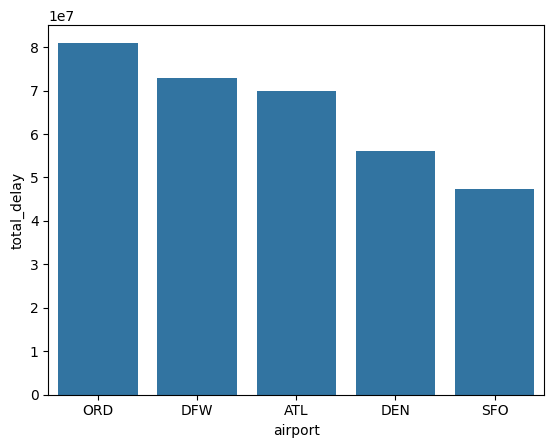

In [43]:
sns.barplot(data=top_5_aiports,x="airport",y="total_delay")
plt.show()

In [44]:
airline_df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Total_delay,delayed
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0,2750.0,1
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0,1598.0,1
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0,1532.0,1
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0,2794.0,1
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0,3060.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171661,2013,8,YV,Mesa Airlines Inc.,TRI,"Bristol/Johnson City/Kingsport, TN: Tri Cities",7.0,1.0,0.78,0.00,...,0.0,0.0,23.0,18.0,0.0,5.0,0.0,0.0,46.0,1
171662,2013,8,YV,Mesa Airlines Inc.,YUM,"Yuma, AZ: Yuma MCAS/Yuma International",2.0,1.0,0.00,0.00,...,0.0,0.0,17.0,0.0,0.0,0.0,0.0,17.0,34.0,1
171663,2013,8,YV,Mesa Airlines Inc.,SLC,"Salt Lake City, UT: Salt Lake City International",2.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
171664,2013,8,DL,Delta Air Lines Inc.,SBN,"South Bend, IN: South Bend International",1.0,1.0,1.00,0.00,...,0.0,0.0,18.0,18.0,0.0,0.0,0.0,0.0,36.0,1


In [48]:
avg_delay_month=airline_df.groupby("month")[["carrier_delay","weather_delay"]].mean().reset_index()
avg_delay_month

,month,carrier_delay,weather_delay
0,1,1434.858602,265.211437
1,2,1301.257394,255.647304
2,3,1370.278679,160.131295
3,4,1298.372490,183.140008
4,5,1364.124450,223.493540
5,6,1816.211563,309.895406
6,7,1929.871054,339.470265
7,8,1681.714040,279.340945
8,9,1045.149876,137.943628
9,10,1174.760152,116.863240


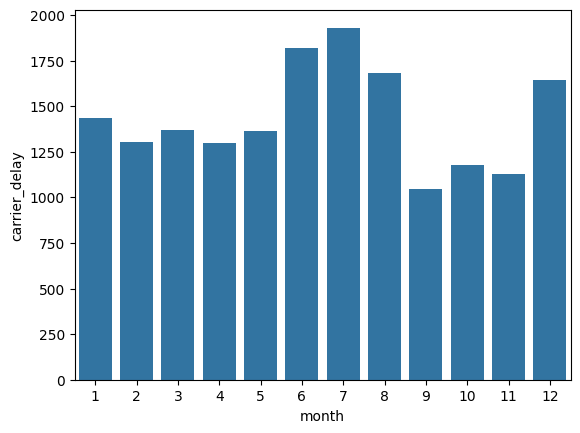

In [49]:
sns.barplot(data=avg_delay_month,y="carrier_delay",x="month")
plt.show()

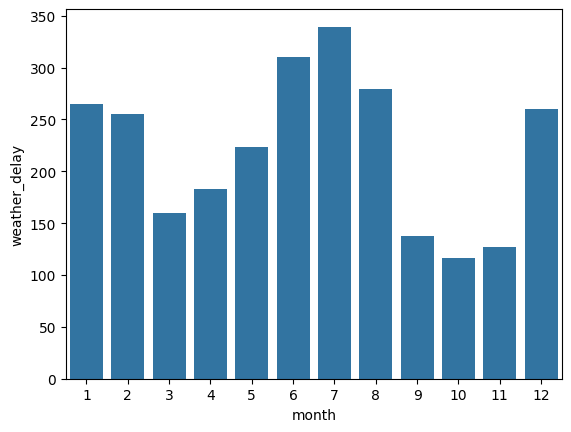

In [50]:
sns.barplot(data=avg_delay_month,y="weather_delay",x="month")
plt.show()

In [51]:
from sklearn.preprocessing import OneHotEncoder

In [52]:
airport_encoder=OneHotEncoder()
encoded_airport=airport_encoder.fit_transform(airline_df[["airport"]]).toarray()

In [53]:
print(encoded_airport)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [54]:
encoded_airport_df=pd.DataFrame(encoded_airport,columns=airport_encoder.get_feature_names_out())
encoded_airport_df

,airport_ABE,airport_ABI,airport_ABQ,airport_ABR,airport_ABY,airport_ACK,airport_ACT,airport_ACV,airport_ACY,airport_ADK,...,airport_VLD,airport_VPS,airport_WRG,airport_WYS,airport_XNA,airport_XWA,airport_YAK,airport_YKM,airport_YNG,airport_YUM
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
171663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
airline_df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Total_delay,delayed
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0,2750.0,1
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0,1598.0,1
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0,1532.0,1
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0,2794.0,1
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0,3060.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171661,2013,8,YV,Mesa Airlines Inc.,TRI,"Bristol/Johnson City/Kingsport, TN: Tri Cities",7.0,1.0,0.78,0.00,...,0.0,0.0,23.0,18.0,0.0,5.0,0.0,0.0,46.0,1
171662,2013,8,YV,Mesa Airlines Inc.,YUM,"Yuma, AZ: Yuma MCAS/Yuma International",2.0,1.0,0.00,0.00,...,0.0,0.0,17.0,0.0,0.0,0.0,0.0,17.0,34.0,1
171663,2013,8,YV,Mesa Airlines Inc.,SLC,"Salt Lake City, UT: Salt Lake City International",2.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
171664,2013,8,DL,Delta Air Lines Inc.,SBN,"South Bend, IN: South Bend International",1.0,1.0,1.00,0.00,...,0.0,0.0,18.0,18.0,0.0,0.0,0.0,0.0,36.0,1


In [56]:
airline_df["delay_per_flight"]=airline_df["Total_delay"]/airline_df["arr_flights"]

In [57]:
airline_df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Total_delay,delayed,delay_per_flight
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,1.0,1375.0,71.0,761.0,118.0,0.0,425.0,2750.0,1,30.898876
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,1.0,799.0,218.0,1.0,62.0,0.0,518.0,1598.0,1,25.774194
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,0.0,766.0,56.0,188.0,78.0,0.0,444.0,1532.0,1,24.709677
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,1.0,1397.0,471.0,320.0,388.0,0.0,218.0,2794.0,1,42.333333
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,0.0,1530.0,628.0,0.0,134.0,0.0,768.0,3060.0,1,33.260870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171661,2013,8,YV,Mesa Airlines Inc.,TRI,"Bristol/Johnson City/Kingsport, TN: Tri Cities",7.0,1.0,0.78,0.00,...,0.0,23.0,18.0,0.0,5.0,0.0,0.0,46.0,1,6.571429
171662,2013,8,YV,Mesa Airlines Inc.,YUM,"Yuma, AZ: Yuma MCAS/Yuma International",2.0,1.0,0.00,0.00,...,0.0,17.0,0.0,0.0,0.0,0.0,17.0,34.0,1,17.000000
171663,2013,8,YV,Mesa Airlines Inc.,SLC,"Salt Lake City, UT: Salt Lake City International",2.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000
171664,2013,8,DL,Delta Air Lines Inc.,SBN,"South Bend, IN: South Bend International",1.0,1.0,1.00,0.00,...,0.0,18.0,18.0,0.0,0.0,0.0,0.0,36.0,1,36.000000


In [58]:
airline_df["delayed"].value_counts()

delayed
1    164878
0      6788
Name: count, dtype: int64

In [59]:
from imblearn.over_sampling import SMOTE

In [66]:
oversampling=SMOTE()
X_resampled,Y_resampled=oversampling.fit_resample(airline_df[["Total_delay"]],airline_df["delayed"])

In [67]:
X_resampled,Y_resampled

(        Total_delay
 0            2750.0
 1            1598.0
 2            1532.0
 3            2794.0
 4            3060.0
 ...             ...
 329751          0.0
 329752          0.0
 329753          0.0
 329754          0.0
 329755          0.0
 
 [329756 rows x 1 columns],
 0         1
 1         1
 2         1
 3         1
 4         1
          ..
 329751    0
 329752    0
 329753    0
 329754    0
 329755    0
 Name: delayed, Length: 329756, dtype: int64)

In [68]:
Y_resampled.shape

(329756,)

In [69]:
delay_cols

['arr_delay',
 'carrier_delay',
 'weather_delay',
 'nas_delay',
 'security_delay',
 'late_aircraft_delay']

In [70]:
corr_delay=airline_df[delay_cols].corr()
corr_delay

,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
arr_delay,1.000000,0.942599,0.769386,0.864241,0.381420,0.964893
carrier_delay,0.942599,1.000000,0.746979,0.701458,0.384794,0.890063
weather_delay,0.769386,0.746979,1.000000,0.625496,0.279696,0.686620
nas_delay,0.864241,0.701458,0.625496,1.000000,0.282139,0.765926
security_delay,0.381420,0.384794,0.279696,0.282139,1.000000,0.374102
late_aircraft_delay,0.964893,0.890063,0.686620,0.765926,0.374102,1.000000


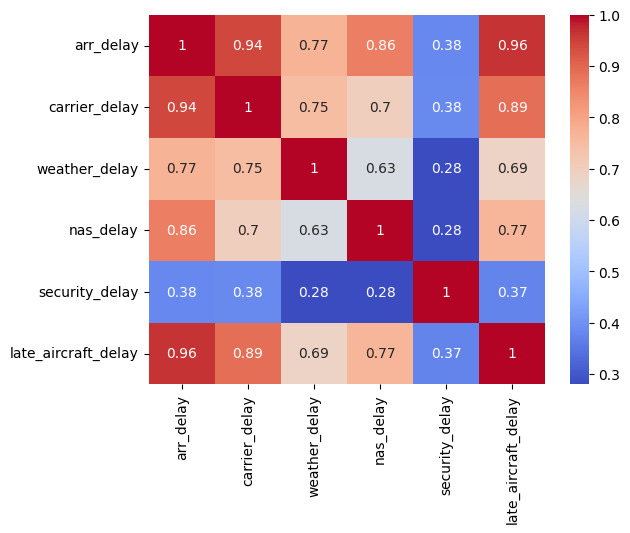

In [71]:
sns.heatmap(corr_delay,cmap="coolwarm",annot=True)
plt.show()

In [72]:
airline_df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Total_delay,delayed,delay_per_flight
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,1.0,1375.0,71.0,761.0,118.0,0.0,425.0,2750.0,1,30.898876
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,1.0,799.0,218.0,1.0,62.0,0.0,518.0,1598.0,1,25.774194
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,0.0,766.0,56.0,188.0,78.0,0.0,444.0,1532.0,1,24.709677
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,1.0,1397.0,471.0,320.0,388.0,0.0,218.0,2794.0,1,42.333333
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,0.0,1530.0,628.0,0.0,134.0,0.0,768.0,3060.0,1,33.260870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171661,2013,8,YV,Mesa Airlines Inc.,TRI,"Bristol/Johnson City/Kingsport, TN: Tri Cities",7.0,1.0,0.78,0.00,...,0.0,23.0,18.0,0.0,5.0,0.0,0.0,46.0,1,6.571429
171662,2013,8,YV,Mesa Airlines Inc.,YUM,"Yuma, AZ: Yuma MCAS/Yuma International",2.0,1.0,0.00,0.00,...,0.0,17.0,0.0,0.0,0.0,0.0,17.0,34.0,1,17.000000
171663,2013,8,YV,Mesa Airlines Inc.,SLC,"Salt Lake City, UT: Salt Lake City International",2.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000
171664,2013,8,DL,Delta Air Lines Inc.,SBN,"South Bend, IN: South Bend International",1.0,1.0,1.00,0.00,...,0.0,18.0,18.0,0.0,0.0,0.0,0.0,36.0,1,36.000000


In [76]:
top_airline_delays=airline_df.groupby("carrier_name")["Total_delay"].sum().nlargest(3).index
print(top_airline_delays)

Index(['Southwest Airlines Co.', 'American Airlines Inc.',
       'SkyWest Airlines Inc.'],
      dtype='object', name='carrier_name')


In [77]:
top_3_df=airline_df[airline_df["carrier_name"].isin(top_airline_delays)]

In [78]:
top_3_df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Total_delay,delayed,delay_per_flight
92,2023,8,AA,American Airlines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",296.0,70.0,28.43,0.00,...,0.0,7128.0,1566.0,0.0,412.0,0.0,5150.0,14256.0,1,48.162162
93,2023,8,AA,American Airlines Inc.,ALB,"Albany, NY: Albany International",93.0,23.0,10.29,0.22,...,0.0,1476.0,515.0,24.0,110.0,21.0,806.0,2952.0,1,31.741935
94,2023,8,AA,American Airlines Inc.,AMA,"Amarillo, TX: Rick Husband Amarillo International",60.0,26.0,10.00,0.00,...,0.0,4719.0,1617.0,0.0,38.0,0.0,3064.0,9438.0,1,157.300000
95,2023,8,AA,American Airlines Inc.,ANC,"Anchorage, AK: Ted Stevens Anchorage Internati...",93.0,37.0,13.00,0.76,...,0.0,1528.0,508.0,29.0,385.0,0.0,606.0,3056.0,1,32.860215
96,2023,8,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",759.0,225.0,67.14,14.76,...,5.0,20112.0,5665.0,950.0,2152.0,11.0,11334.0,40224.0,1,52.996047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171581,2013,8,WN,Southwest Airlines Co.,PDX,"Portland, OR: Portland International",1066.0,250.0,71.48,1.69,...,1.0,11254.0,2602.0,182.0,809.0,16.0,7645.0,22508.0,1,21.114447
171582,2013,8,WN,Southwest Airlines Co.,PHL,"Philadelphia, PA: Philadelphia International",575.0,200.0,65.02,17.86,...,0.0,11806.0,4151.0,1224.0,2454.0,0.0,3977.0,23612.0,1,41.064348
171583,2013,8,WN,Southwest Airlines Co.,PHX,"Phoenix, AZ: Phoenix Sky Harbor International",4986.0,1267.0,367.33,16.66,...,17.0,55837.0,15556.0,727.0,6081.0,87.0,33386.0,111674.0,1,22.397513
171584,2013,8,WN,Southwest Airlines Co.,PIT,"Pittsburgh, PA: Pittsburgh International",535.0,164.0,49.05,3.81,...,1.0,7853.0,1932.0,264.0,884.0,0.0,4773.0,15706.0,1,29.357009


In [80]:
yearly_top3=top_3_df.groupby(["year","carrier_name"])["Total_delay"].sum().reset_index()
yearly_top3

,year,carrier_name,Total_delay
0,2013,American Airlines Inc.,4320732.0
1,2013,SkyWest Airlines Inc.,5155250.0
2,2013,Southwest Airlines Co.,10820038.0
3,2014,American Airlines Inc.,14264431.0
4,2014,SkyWest Airlines Inc.,14478461.0
5,2014,Southwest Airlines Co.,30725286.0
6,2015,American Airlines Inc.,15662870.0
7,2015,SkyWest Airlines Inc.,13018791.0
8,2015,Southwest Airlines Co.,24742768.0
9,2016,American Airlines Inc.,21418730.0


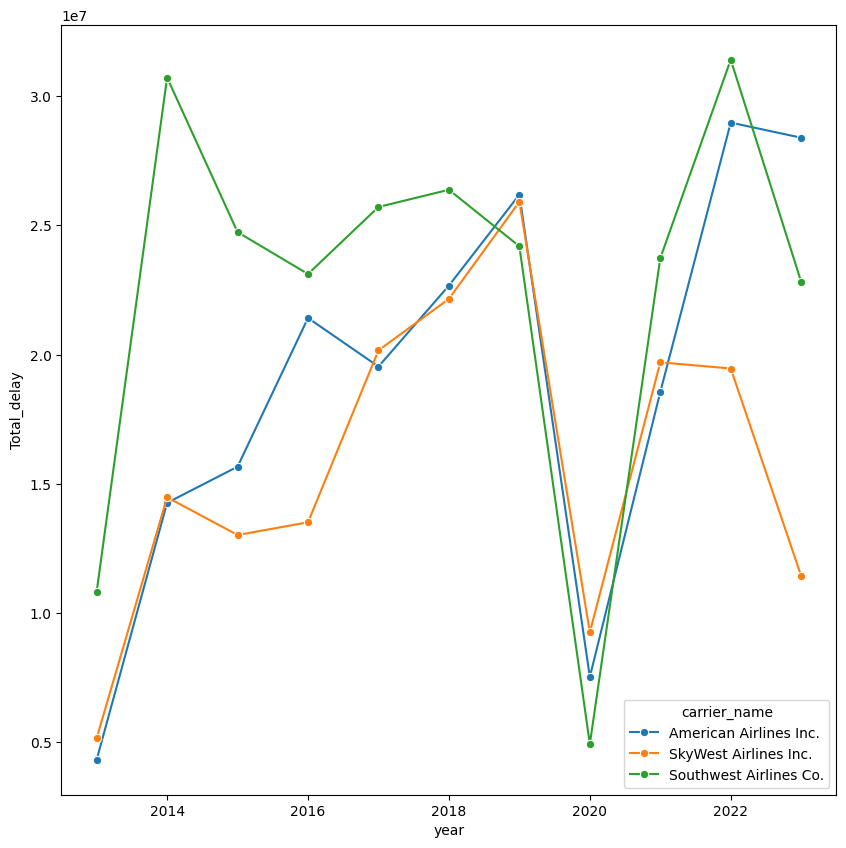

In [85]:
plt.figure(figsize=(10,10))
sns.lineplot(data=yearly_top3,x="year",y="Total_delay",hue="carrier_name",marker="o")
plt.show()